# Editable Box Plots

In [86]:
import os
import sys
from pathlib import Path
from itertools import zip_longest

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs, TSNEPlot
from larval_gonad.config import memory
from larval_gonad.cell_selection import SOMA, EARLY_GERM, LATE_GERM
from larval_gonad.x_to_a import multi_chrom_boxplot, commonly_expressed, CHROMS_CHR
from larval_gonad.scRNAseq import CLUSTER_ANNOT

# Setup notebook
nbconfig = Nb.setup_notebook(subproject_dir='../output/science_submission/', 
                             seurat_dir='../output/combined_testis_force', 
                             formats=['pdf', ], styles=['notebook', 'paper'])

last updated: 2018-05-07 
Git hash: 1a7ba88a88a0ff24c9397783dc6ab1c3ea3c808b


In [87]:
colors = sns.color_palette('tab20', n_colors=12, desat=.8)
greys = sns.color_palette('Greys')
reds = sns.color_palette('Reds')
reds[0] = greys[1]
blacks = [greys[1], '#000000']

boxplot_colors = [
    reds[-1],     # X
    '#ffffff', # 2L
    '#ffffff', # 2R
    '#ffffff', # 3L
    '#ffffff', # 3R
    reds[-1],     # 4
]

In [88]:
clusters = nbconfig.seurat.get_clusters()
tsne = nbconfig.seurat.get_tsne()
norm = nbconfig.seurat.get_normalized_read_counts()
raw = nbconfig.seurat.get_raw()

## X To A Analysis (commonly expressed)

In [94]:
def strip_chr(ax):
    labels = ax.get_xticklabels()
    new = []
    for l in labels:
        new.append(l.get_text().strip('chr'))
        
    ax.set_xticklabels(new)

In [101]:
def plot_cluster_x2a(df, fbgns, cluster_id, ax1, ax2):
    idx = dat.query(f'cluster == {cluster_id}').index
    dat.drop('cluster', axis=1)
    
    dataM = dat.loc[idx, fbgns].median().to_frame().join(nbconfig.fbgn2chrom).query('chrom != "chrY"')
    dataM.columns = ['Normalized Expression (Median)', 'Chromosome Arm']
    
    dataS = dat.loc[idx, fbgns].sum().to_frame().join(nbconfig.fbgn2chrom).query('chrom != "chrY"')
    dataS.columns = ['Normalized Expression (Sum)', 'Chromosome Arm']
    
    multi_chrom_boxplot('Chromosome Arm', 'Normalized Expression (Sum)', 
                        data=dataS, notch=True, 
                        palette=boxplot_colors, 
                        use_text=False, 
                        multiplier=(1, .1), 
                        showfliers=False,
                        ax=ax1)
    
    multi_chrom_boxplot('Chromosome Arm', 'Normalized Expression (Median)', 
                        data=dataM, notch=True, 
                        palette=boxplot_colors, 
                        use_text=False, 
                        multiplier=(1, 0), 
                        showfliers=False,
                        ax=ax2)
    
    #ax.set_title(f'{CLUSTER_ANNOT[cluster_id]}')
    strip_chr(ax1)
    strip_chr(ax2)
    
    ax1.set_xlabel('')
    ax2.set_xlabel('')
    
    ax1.set_ylabel('')
    ax2.set_ylabel('')

In [102]:
expressed = commonly_expressed(norm)
dat = norm.T.join(clusters['res.0.4'])
dat.rename({'res.0.4': 'cluster'}, inplace=True, axis=1)

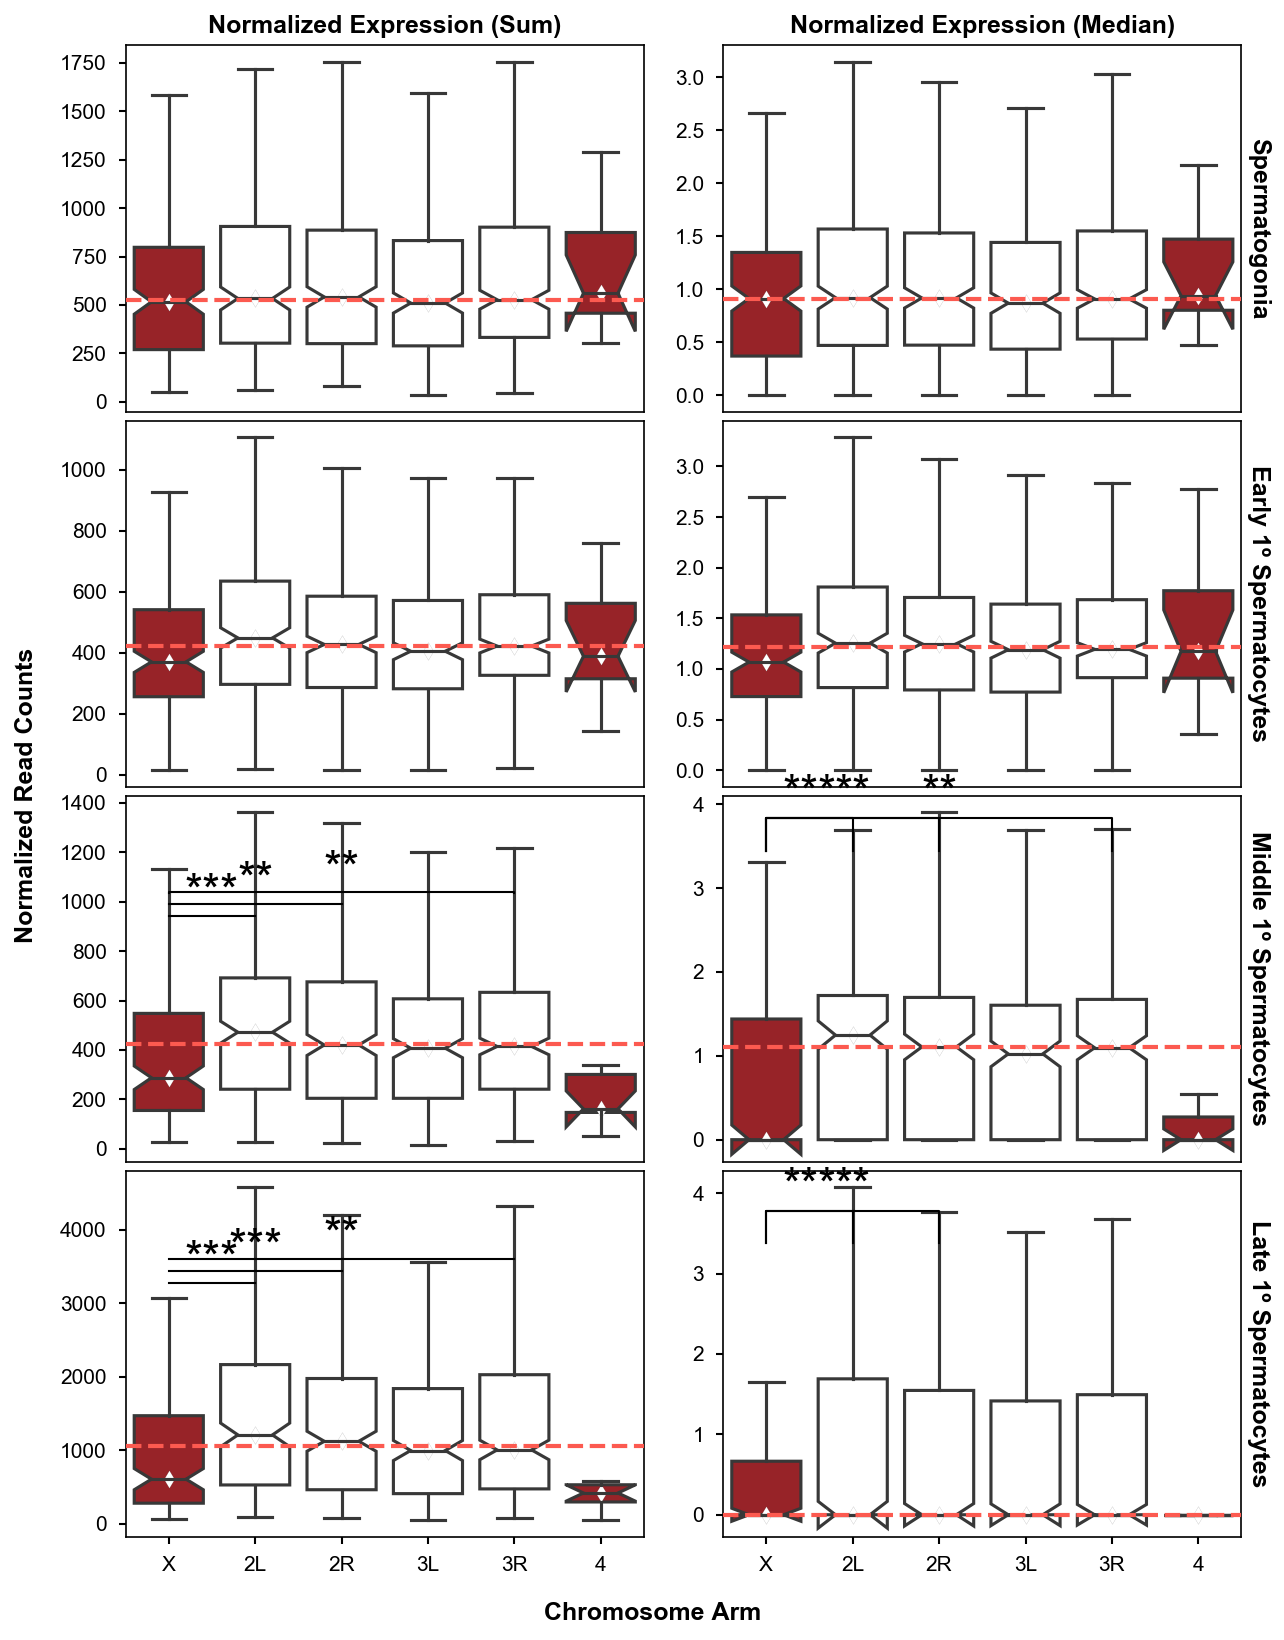

In [103]:
@make_figs(nbconfig.fig_name('HistogramBoxFig'), styles=nbconfig.styles, formats=nbconfig.formats, kws_layout={"h_pad": .03})
def _plot():
    fig, axes = plt.subplots(4, 2, figsize=(8.5, 11), sharex=True)

    plot_cluster_x2a(dat, expressed, 4, *axes[0])
    plot_cluster_x2a(dat, expressed, 8, *axes[1])
    plot_cluster_x2a(dat, expressed, 6, *axes[2])
    plot_cluster_x2a(dat, expressed, 0, *axes[3])

    axes[0][0].set_title('Normalized Expression (Sum)', fontsize=12, fontweight='bold')
    axes[0][1].set_title('Normalized Expression (Median)', fontsize=12, fontweight='bold')

    ax = axes[0][1]
    axes[0][1].text(1.01, .5, 'Spermatogonia', rotation=-90, transform=axes[0][1].transAxes, fontsize=12, va='center', fontweight='bold')
    axes[1][1].text(1.01, .5, 'Early 1º Spermatocytes', rotation=-90, transform=axes[1][1].transAxes, fontsize=12, va='center', fontweight='bold')
    axes[2][1].text(1.01, .5, 'Middle 1º Spermatocytes', rotation=-90, transform=axes[2][1].transAxes, fontsize=12, va='center', fontweight='bold')
    axes[3][1].text(1.01, .5, 'Late 1º Spermatocytes', rotation=-90, transform=axes[3][1].transAxes, fontsize=12, va='center', fontweight='bold')

    plt.text(0, .5, 'Normalized Read Counts', rotation=90, transform=fig.transFigure, fontsize=12, va='center', fontweight='bold')
    plt.text(.5, 0, 'Chromosome Arm', transform=fig.transFigure, fontsize=12, fontweight='bold', ha='center')

    for axs in axes[:3]:
        axs[0].xaxis.set_visible(False)
        axs[1].xaxis.set_visible(False)
        
_plot()

In [104]:
expressed = commonly_expressed(norm)
dat = raw.T.join(clusters['res.0.4'])
dat.rename({'res.0.4': 'cluster'}, inplace=True, axis=1)

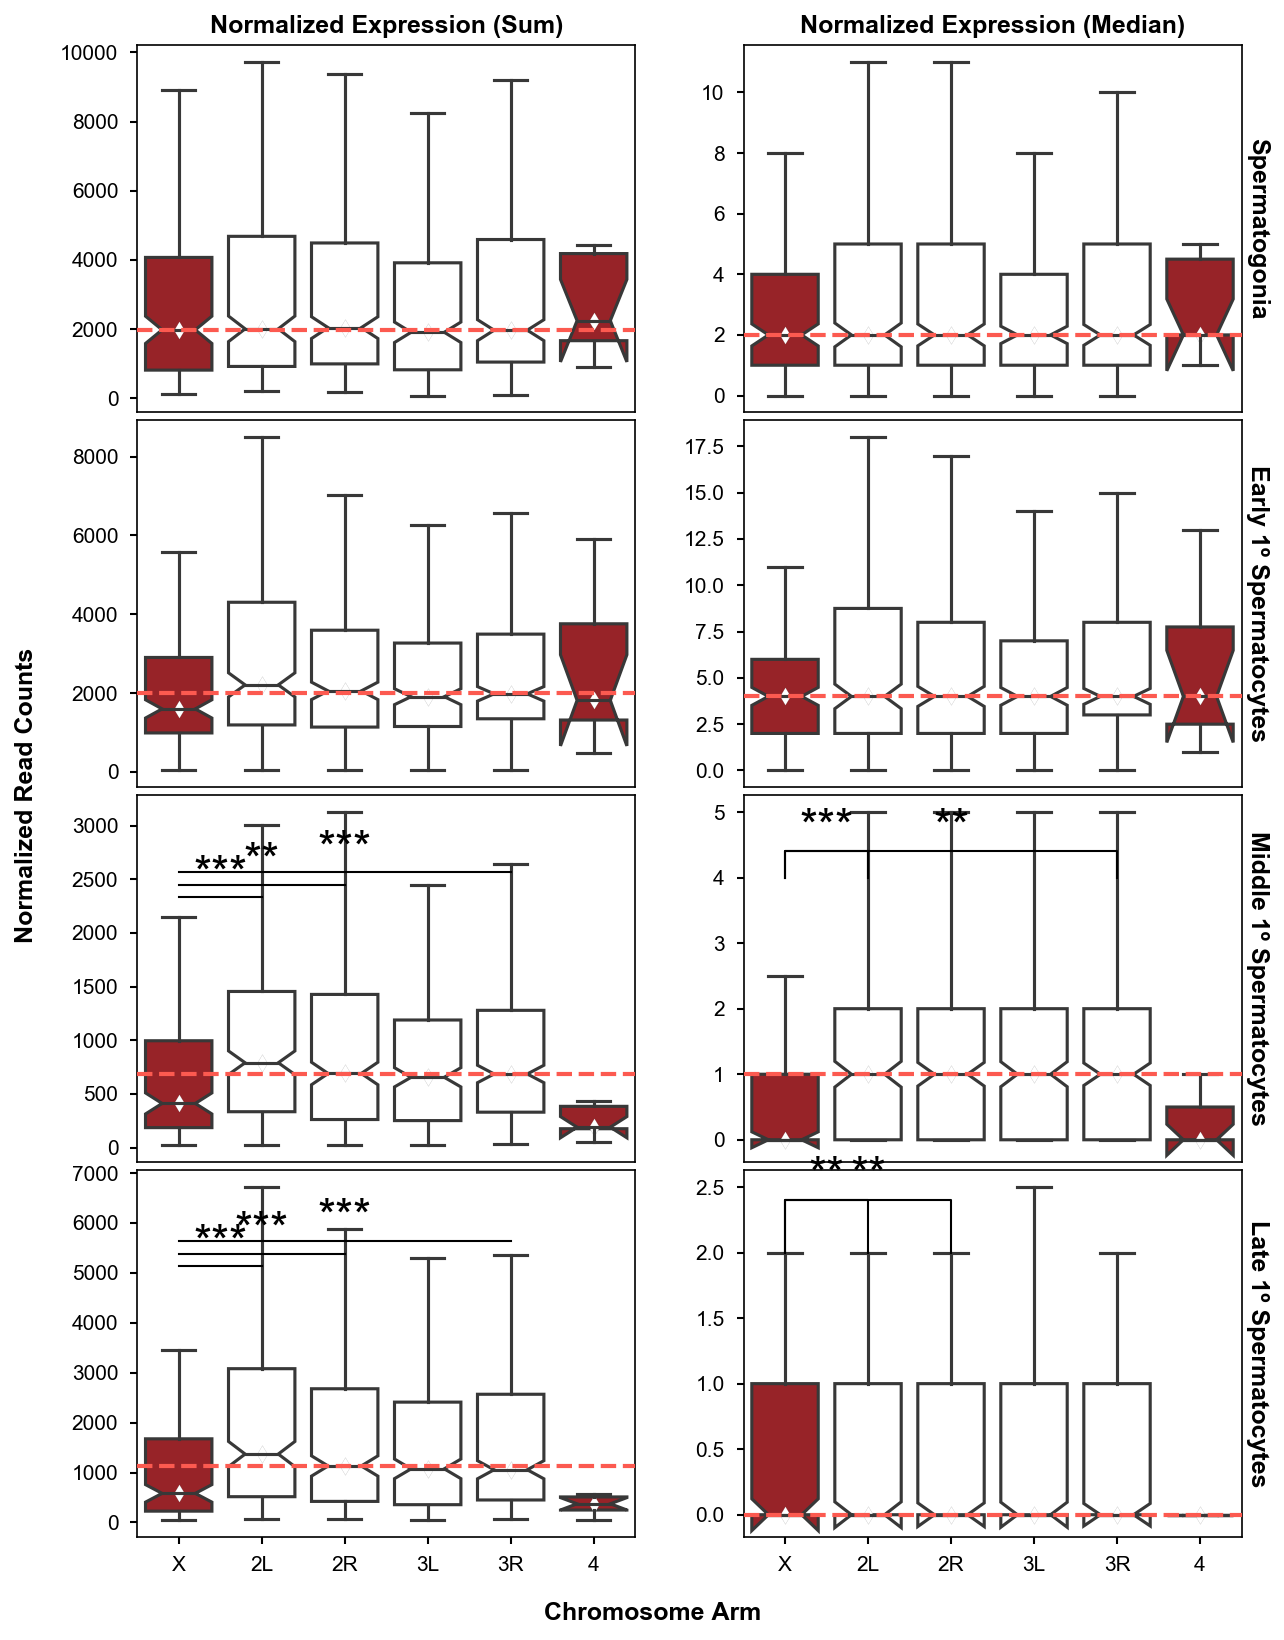

In [105]:
@make_figs(nbconfig.fig_name('HistogramBoxFig_raw'), styles=nbconfig.styles, formats=nbconfig.formats, kws_layout={"h_pad": .03})
def _plot():
    fig, axes = plt.subplots(4, 2, figsize=(8.5, 11), sharex=True)

    plot_cluster_x2a(dat, expressed, 4, *axes[0])
    plot_cluster_x2a(dat, expressed, 8, *axes[1])
    plot_cluster_x2a(dat, expressed, 6, *axes[2])
    plot_cluster_x2a(dat, expressed, 0, *axes[3])

    axes[0][0].set_title('Normalized Expression (Sum)', fontsize=12, fontweight='bold')
    axes[0][1].set_title('Normalized Expression (Median)', fontsize=12, fontweight='bold')

    ax = axes[0][1]
    axes[0][1].text(1.01, .5, 'Spermatogonia', rotation=-90, transform=axes[0][1].transAxes, fontsize=12, va='center', fontweight='bold')
    axes[1][1].text(1.01, .5, 'Early 1º Spermatocytes', rotation=-90, transform=axes[1][1].transAxes, fontsize=12, va='center', fontweight='bold')
    axes[2][1].text(1.01, .5, 'Middle 1º Spermatocytes', rotation=-90, transform=axes[2][1].transAxes, fontsize=12, va='center', fontweight='bold')
    axes[3][1].text(1.01, .5, 'Late 1º Spermatocytes', rotation=-90, transform=axes[3][1].transAxes, fontsize=12, va='center', fontweight='bold')

    plt.text(0, .5, 'Normalized Read Counts', rotation=90, transform=fig.transFigure, fontsize=12, va='center', fontweight='bold')
    plt.text(.5, 0, 'Chromosome Arm', transform=fig.transFigure, fontsize=12, fontweight='bold', ha='center')

    for axs in axes[:3]:
        axs[0].xaxis.set_visible(False)
        axs[1].xaxis.set_visible(False)
        
_plot()

In [36]:
def plot_cluster_x2a(df, fbgns, cluster_id, ax=None):
    if cluster_id > 11:
        return 
    
    idx = dat.query(f'cluster == {cluster_id}').index
    dat.drop('cluster', axis=1)
    data = dat.loc[idx, fbgns].median().to_frame().join(nbconfig.fbgn2chrom).query('chrom != "chrY"')
    data.columns = ['Normalized Expression', 'Chromosome']
    multi_chrom_boxplot('Chromosome', 'Normalized Expression', data=data, flierprops={'alpha': .6}, notch=True, 
                        palette=boxplot_colors, use_text=False, multiplier=(1.2, .5), ax=ax)
    
    ax.set_ylim(None, 6.5);
    ax.set_xlabel('')
    ax.set_title(f'{CLUSTER_ANNOT[cluster_id]}')
    strip_chr(ax)

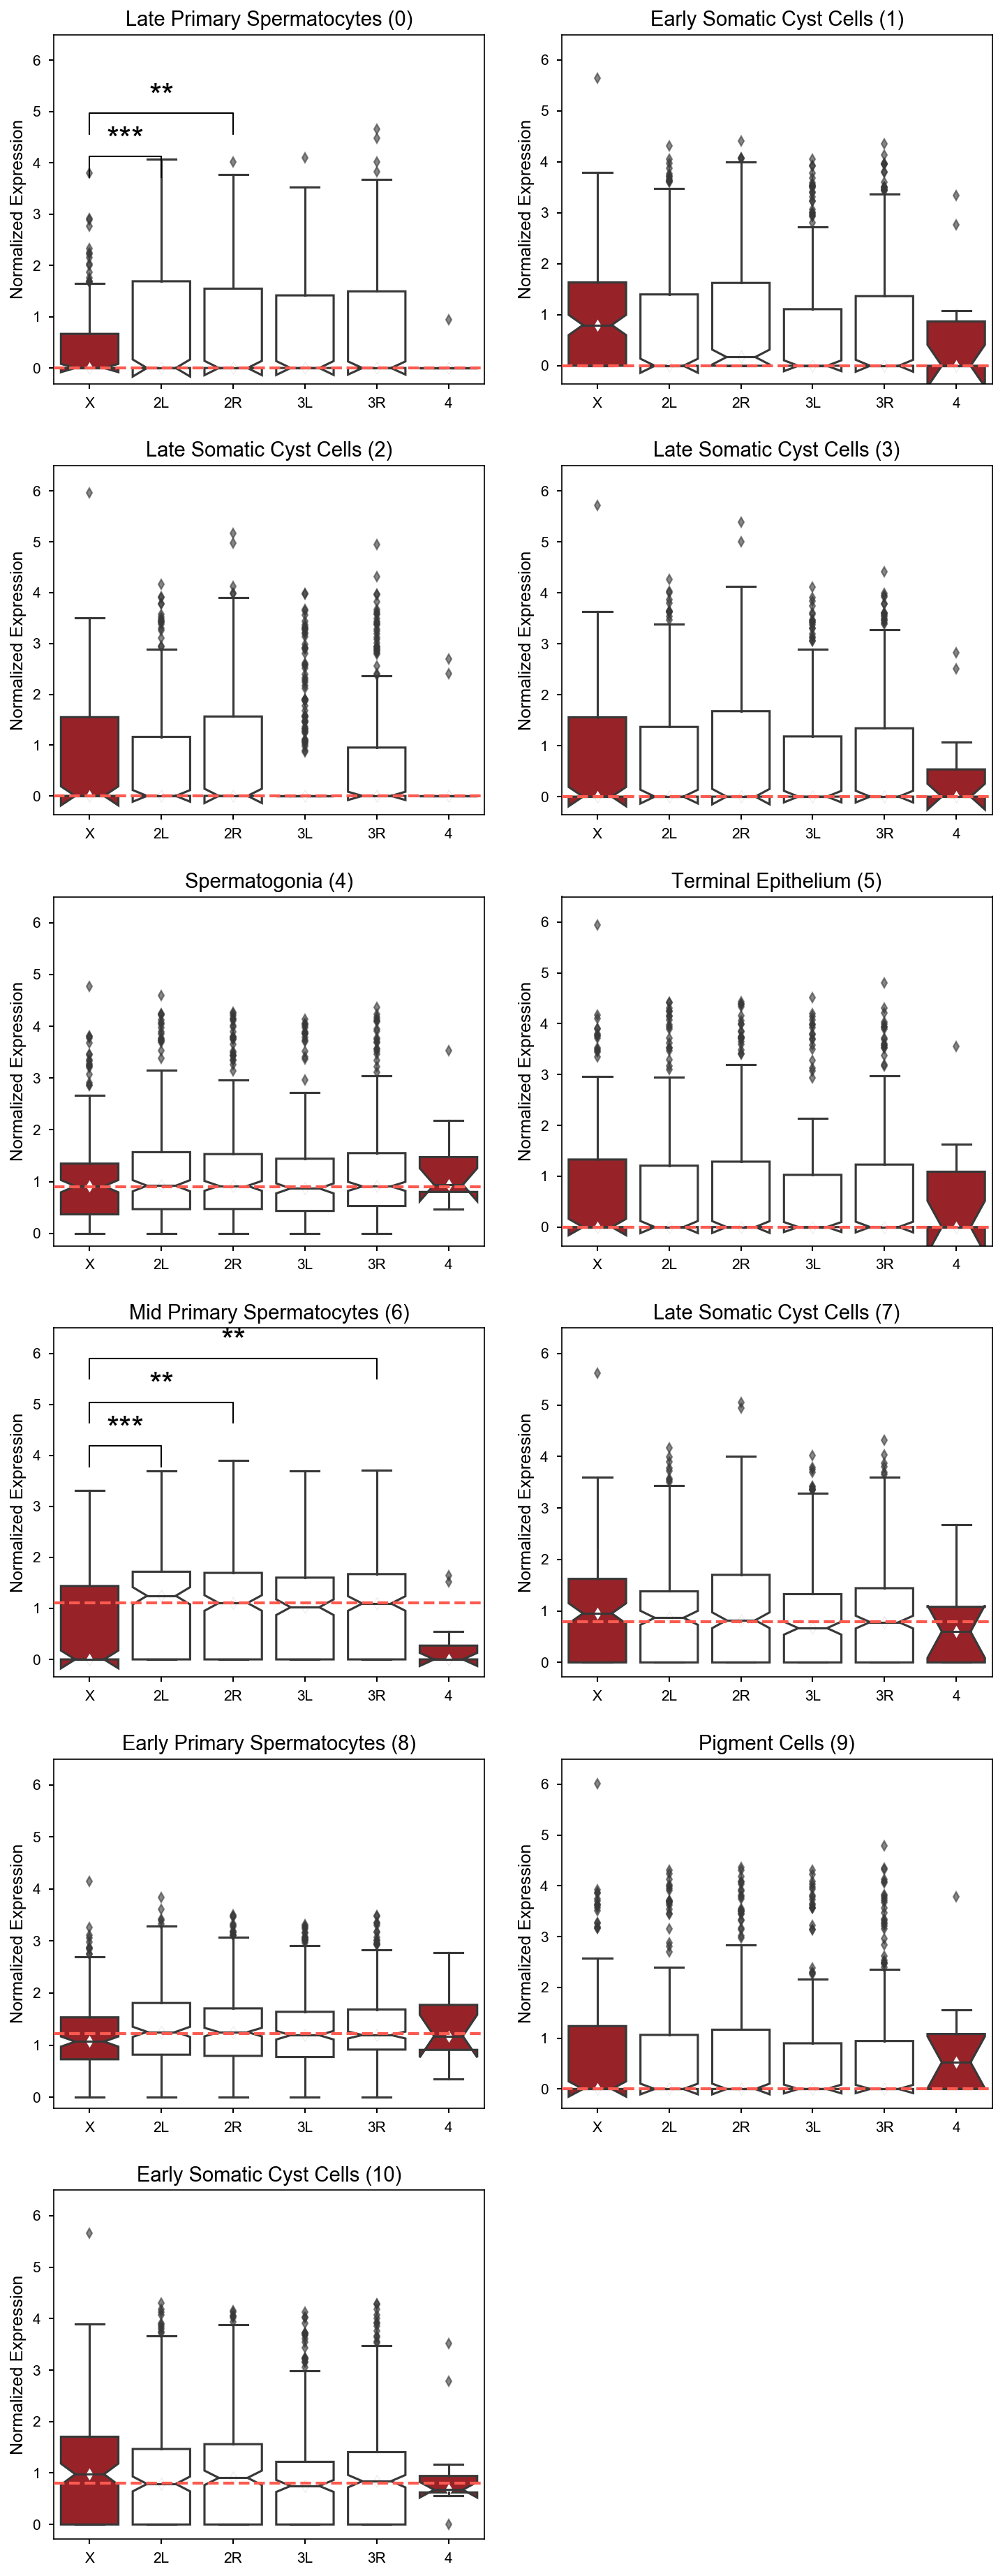

In [46]:
@make_figs(nbconfig.fig_name('boxplots_by_arm'), styles=nbconfig.styles, formats=nbconfig.formats)
def _plot():
    #fig, axes = plt.subplots(6, 2, figsize=(10, 25), gridspec_kw={'wspace': .4, 'hspace': .4})
    fig, axes = plt.subplots(6, 2, figsize=(10, 25))
    for i, ax in enumerate(axes.flatten()):
        plot_cluster_x2a(dat, expressed, i, ax)
    ax.set_visible(False)

_plot()

In [43]:
def plot_cluster_x2a_sum(df, fbgns, cluster_id, ax=None):
    if cluster_id > 11:
        return 
    
    idx = dat.query(f'cluster == {cluster_id}').index
    dat.drop('cluster', axis=1)
    data = dat.loc[idx, fbgns].sum().to_frame().join(nbconfig.fbgn2chrom).query('chrom != "chrY"')
    data.columns = ['Normalized Expression', 'Chromosome']
    multi_chrom_boxplot('Chromosome', 'Normalized Expression', data=data, flierprops={'alpha': .6}, notch=True, 
                        palette=boxplot_colors, use_text=False, multiplier=(1.2, .5), ax=ax)
    
    #ax.set_ylim(None, 6.5);
    ax.set_xlabel('')
    ax.set_title(f'{CLUSTER_ANNOT[cluster_id]}')
    strip_chr(ax)

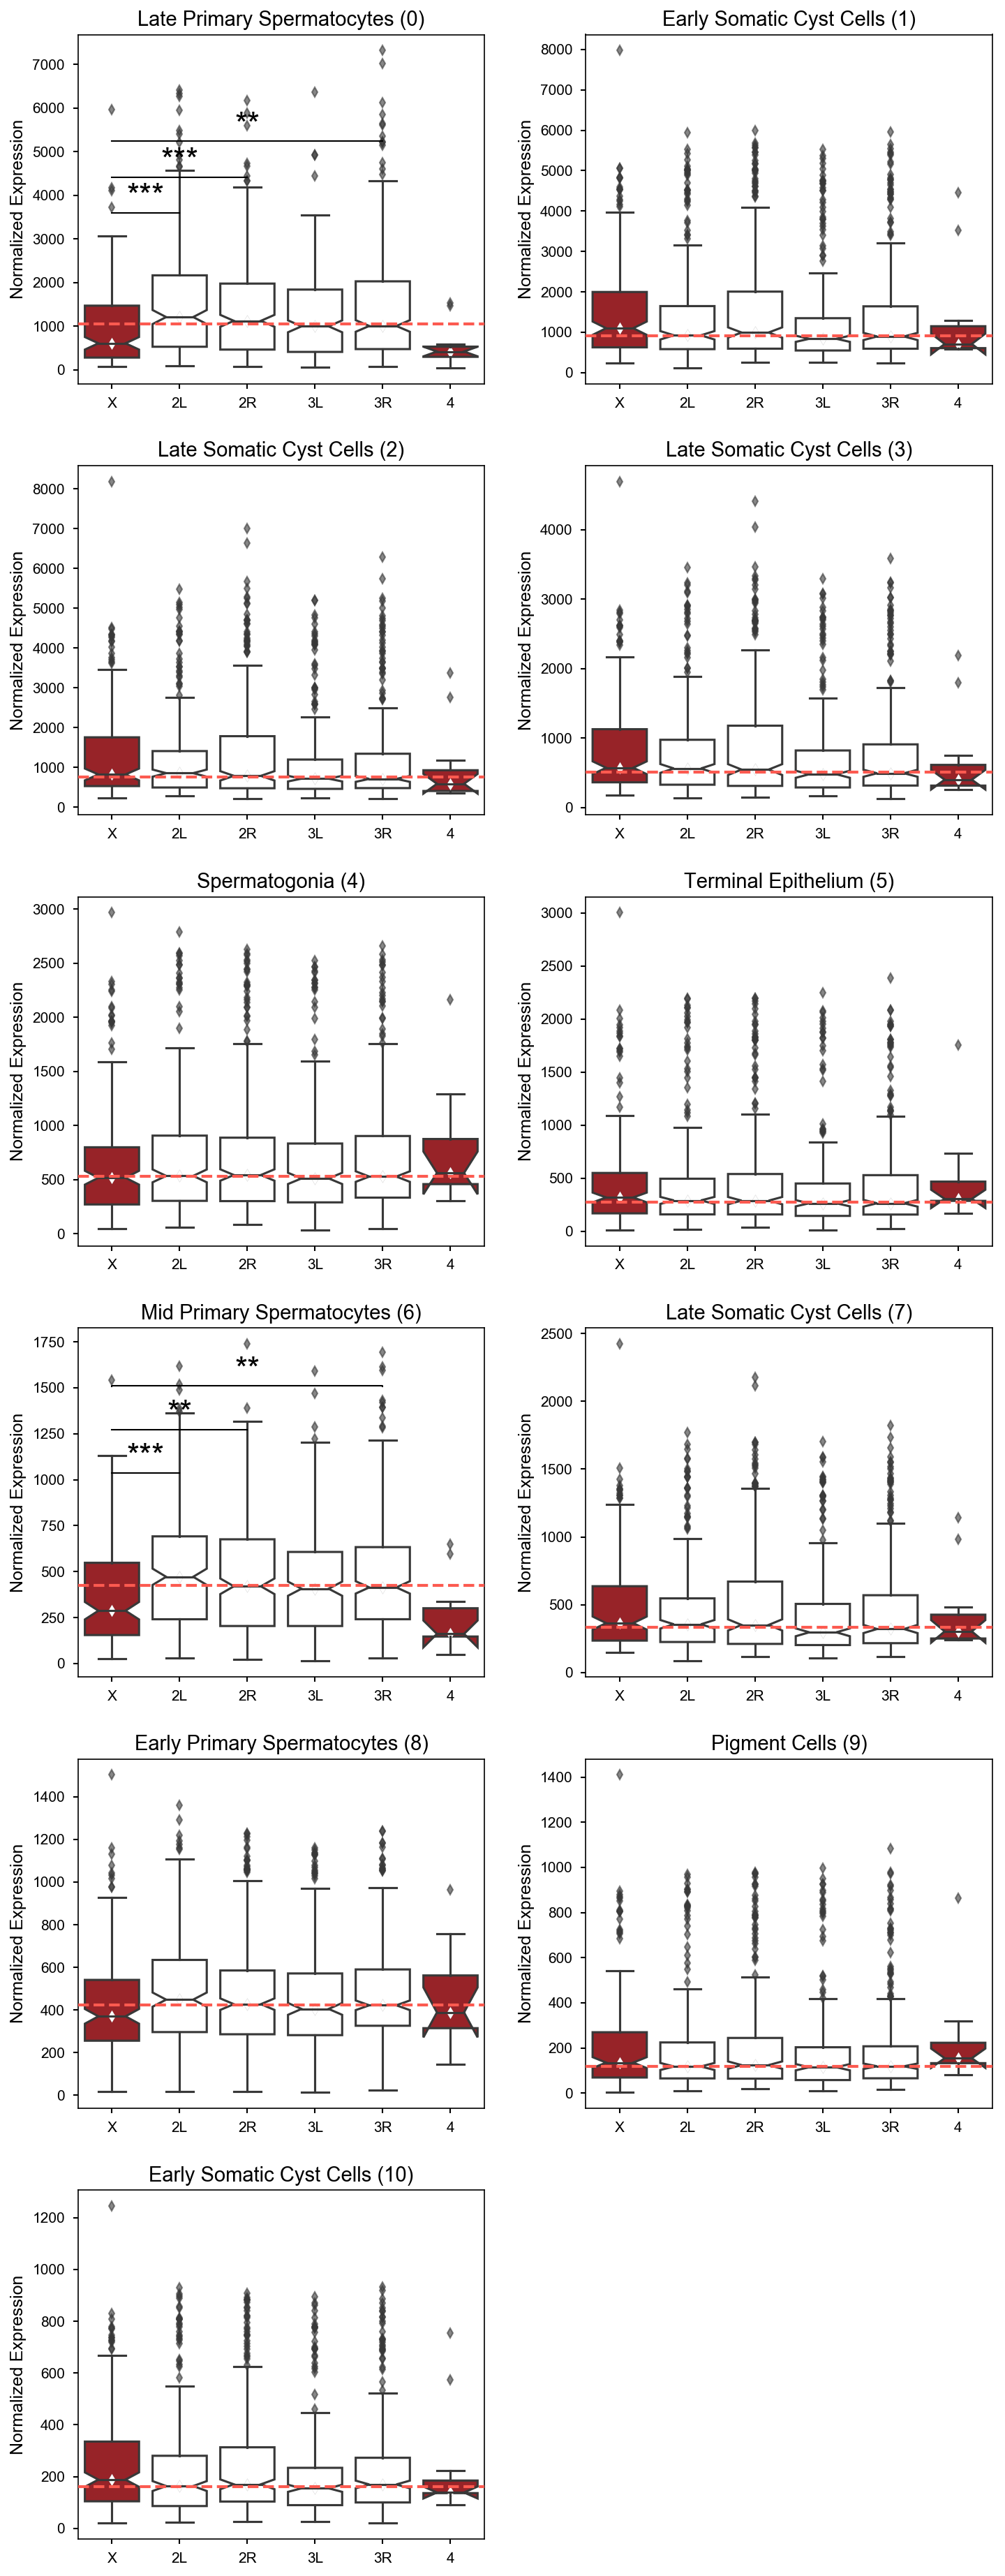

In [47]:
@make_figs(nbconfig.fig_name('boxplots_by_arm_sum'), styles=nbconfig.styles, formats=nbconfig.formats)
def _plot():
    #fig, axes = plt.subplots(6, 2, figsize=(10, 25), gridspec_kw={'wspace': .4, 'hspace': .4})
    fig, axes = plt.subplots(6, 2, figsize=(10, 25))
    for i, ax in enumerate(axes.flatten()):
        plot_cluster_x2a_sum(dat, expressed, i, ax)
    ax.set_visible(False)

_plot()

In [ ]:
dat.head()